# Kaggle Choose tutors

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/choose-tutors/train.csv
/kaggle/input/choose-tutors/submission_example.csv
/kaggle/input/choose-tutors/test.csv


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и подготовка данных

In [3]:
data = pd.read_csv("/kaggle/input/choose-tutors/train.csv", sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [4]:
X = data.drop(['Id', 'choose'], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11)
memory usage: 859.5 KB


In [5]:
X = X.values
X

array([[3.50e+01, 0.00e+00, 2.15e+03, ..., 0.00e+00, 0.00e+00, 7.40e+01],
       [5.20e+01, 2.00e+00, 1.25e+03, ..., 0.00e+00, 1.00e+00, 5.70e+01],
       [2.90e+01, 3.00e+00, 1.75e+03, ..., 0.00e+00, 0.00e+00, 6.60e+01],
       ...,
       [4.40e+01, 5.00e+00, 1.75e+03, ..., 0.00e+00, 1.00e+00, 5.90e+01],
       [4.10e+01, 0.00e+00, 1.70e+03, ..., 0.00e+00, 0.00e+00, 7.20e+01],
       [4.10e+01, 5.00e+00, 1.20e+03, ..., 0.00e+00, 0.00e+00, 4.00e+01]])

In [6]:
y = data[['choose']]
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
choose    10000 non-null int64
dtypes: int64(1)
memory usage: 78.2 KB


In [7]:
y = y.values.flatten()
y

array([0, 1, 0, ..., 0, 0, 0])

In [8]:
test = pd.read_csv("/kaggle/input/choose-tutors/test.csv", sep=",")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [9]:
test_X = test.drop(['Id'], axis = 1)
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11)
memory usage: 859.5 KB


In [10]:
test_X = test_X.values
test_X

array([[3.20e+01, 2.00e+00, 2.70e+03, ..., 0.00e+00, 0.00e+00, 9.00e+01],
       [3.50e+01, 6.00e+00, 1.80e+03, ..., 0.00e+00, 0.00e+00, 7.10e+01],
       [4.40e+01, 2.00e+00, 1.20e+03, ..., 0.00e+00, 0.00e+00, 4.50e+01],
       ...,
       [4.40e+01, 2.00e+00, 1.25e+03, ..., 0.00e+00, 0.00e+00, 6.30e+01],
       [5.10e+01, 5.00e+00, 1.00e+03, ..., 0.00e+00, 0.00e+00, 6.40e+01],
       [4.30e+01, 0.00e+00, 1.50e+03, ..., 0.00e+00, 0.00e+00, 4.10e+01]])

# XGBoost

In [11]:
class Leaf_Reg:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        prediction = np.mean(self.labels)
        return prediction

In [12]:
class Node:
    # Класс узла
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [13]:
def quality_reg(left_labels, right_labels, current_variance):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_variance - p * np.var(left_labels) - (1 - p) * np.var(right_labels)

In [14]:
def split(data, labels, index, t):
    # Разбиение датасета в узле
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [15]:
def find_best_split_reg(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_variance = np.var(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality_reg(true_labels, false_labels, current_variance)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [16]:
def build_tree_reg_depth_lim(data, labels, depth_lim = 20, depth = 0):

    quality, t, index = find_best_split_reg(data, labels)
    #print("q: {} t: {} ind: {}".format(quality, t, index))

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0 or depth >= depth_lim:
        return Leaf_Reg(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree_reg_depth_lim(true_data, true_labels, depth_lim, depth + 1)
    false_branch = build_tree_reg_depth_lim(false_data, false_labels, depth_lim, depth + 1)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [17]:
def pred_item(item, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf_Reg):
        answer = node.prediction
        return answer

    if item[node.index] <= node.t:
        return pred_item(item, node.true_branch)
    else:
        return pred_item(item, node.false_branch)

In [18]:
def gb_predict_m(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta * coef * pred_item(x, tree) for tree, coef in zip(trees_list, coef_list)]) for x in X])

In [19]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [20]:
def bias(y, z):
    return (y - z)

In [21]:
def gb_fit_lt(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    err_min = np.inf
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_reg_depth_lim(X_train, y_train, max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict_m(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict_m(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_m(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_reg_depth_lim(X_train, bias(y_train, target), max_depth)
            
            train_errors.append(mean_squared_error(y_train, gb_predict_m(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict_m(X_test, trees, coefs, eta)))
            
#             if test_errors[-1]-0.00005 > err_min:
#                 print(len(trees))
#                 break
#             elif test_errors[-1] < err_min:
#                 err_min = test_errors[-1]

        if not (i+1)%10:
            print(i+1)
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [22]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(2, n_trees+1)
    plt.plot(list(range(2, n_trees+1)), train_err[1:], label='train error')
    plt.plot(list(range(2, n_trees+1)), test_err[1:], label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [23]:
def grid_mtr(n_trees_l, max_depth_l, eta_l, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    err_min = np.inf
    for tr in n_trees_l:
        for dp in max_depth_l:
            for et in eta_l:
                coefs = [1] * tr # для простоты примем коэффициенты равными 1
                trees, train_errors, test_errors = gb_fit_lt(tr, dp, X_train, X_test, y_train, y_test, coefs, et)
                train_prediction = gb_predict_m(X_train, trees, coefs, et)
                print(f'Ошибка алгоритма из {len(trees)} деревьев глубиной {dp} с шагом {et} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')
                test_prediction = gb_predict_m(X_test, trees, coefs, et)
                err = mean_squared_error(y_test, test_prediction)
                print(f'Ошибка алгоритма из {len(trees)} деревьев глубиной {dp} с шагом {et} на тестовой выборке: {err}')
                if err_min > err:
                    tr_b = len(trees)
                    dp_b = dp
                    et_b = et
                    err_min = err
                print(test_errors)
                get_error_plot(len(train_errors), train_errors, test_errors)
    print(f'Лучшие параметры: Ошибка алгоритма из {tr_b} деревьев глубиной {dp_b} с шагом {et_b} на тестовой выборке: {err_min}')
    return tr_b, dp_b, et_b

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
Ошибка алгоритма из 250 деревьев глубиной 2 с шагом 0.1 на тренировочной выборке: 0.07440242399433854
Ошибка алгоритма из 250 деревьев глубиной 2 с шагом 0.1 на тестовой выборке: 0.08157734543778594
[0.12, 0.11573533238556162, 0.11226540712940783, 0.10964610647411704, 0.10694974766848218, 0.10473402134646881, 0.10295729702413241, 0.10144605011925345, 0.10009279972166515, 0.09916112635839157, 0.09823053390420808, 0.09698358760430369, 0.09636699109920499, 0.09550852509970804, 0.09498325681152632, 0.0945162100116016, 0.09414269597960082, 0.09358358196476704, 0.09304173591292782, 0.09274760631096933, 0.09242434290951171, 0.09214683609347281, 0.09188215499236897, 0.09125147240567283, 0.09100216772454679, 0.0906922078709769, 0.09043298980355613, 0.08991921465023314, 0.08972916959532597, 0.08952825424371802, 0.08925415056343272, 0.0890848554782742, 0.08880746815086568, 0.08841793320887785, 0.08827783949

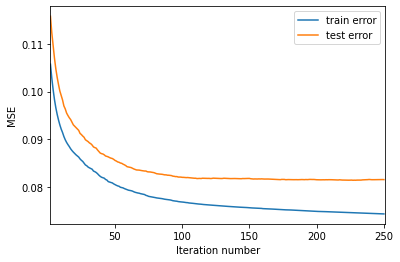

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
Ошибка алгоритма из 250 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 0.0689350786869558
Ошибка алгоритма из 250 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 0.08200076527326135
[0.12, 0.1153264528816047, 0.1114436473227925, 0.10806188581831257, 0.10518346505494608, 0.10274293375974772, 0.10090100878231643, 0.099147895668543, 0.09784813062644186, 0.09639886559968874, 0.09528928789900175, 0.09370637532027361, 0.09281576042340313, 0.09216562854460493, 0.09127003032077903, 0.09083051824105935, 0.09044532017862923, 0.08988015628067755, 0.08927329325083205, 0.08843076919235837, 0.08813213364910744, 0.08771381535163485, 0.08751238212784898, 0.08717065909083076, 0.08678180761559709, 0.08660450316054737, 0.08629742577245461, 0.08610417120901342, 0.08558052464894883, 0.0851392840900424, 0.0849631007235202, 0.08479657178582803, 0.08464333820912359, 0.08439523795580578, 0.084293773494533

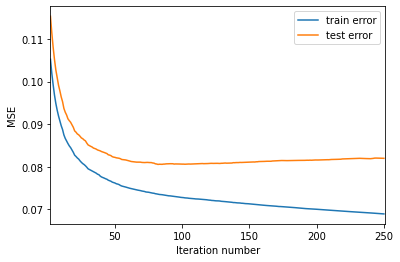

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
Ошибка алгоритма из 250 деревьев глубиной 4 с шагом 0.1 на тренировочной выборке: 0.06130660574435738
Ошибка алгоритма из 250 деревьев глубиной 4 с шагом 0.1 на тестовой выборке: 0.0839658367291162
[0.12, 0.11483865387924247, 0.11055926006851748, 0.10690429871843818, 0.10386436275825127, 0.10081314909020157, 0.09889467948981424, 0.09662346199888316, 0.09503966292441517, 0.09353699451877591, 0.09224063412813714, 0.0907902655064026, 0.0899136454053441, 0.0891140710409269, 0.08837078810512305, 0.08727715918480974, 0.08679549358040578, 0.0863857181521506, 0.08588657628314583, 0.08525968763024387, 0.08488574438084781, 0.0845454929114956, 0.08419798486907133, 0.08392183957928658, 0.08372063041734563, 0.08351490550195319, 0.08330484419636913, 0.08323219347475753, 0.08300841281034531, 0.08281044502951951, 0.08259625420029125, 0.08228269692702125, 0.08212146575403387, 0.08187708218873736, 0.08179766071564

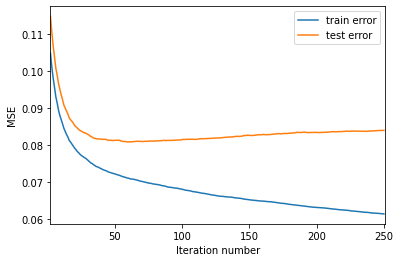

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
Ошибка алгоритма из 250 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 0.05297452291718303
Ошибка алгоритма из 250 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 0.08576384526512529
[0.12, 0.11456221681273751, 0.11011264691425153, 0.10582814693550205, 0.1022119243485251, 0.09930744228536711, 0.09688855672612863, 0.0949572023067737, 0.09335441936843666, 0.09198947379962832, 0.09063272408689034, 0.08976366172579109, 0.0883717238369305, 0.0872563693150469, 0.0865593295113196, 0.08595892765879322, 0.08548133867645205, 0.08480170134901192, 0.08424131161737525, 0.08390632921936522, 0.08343261570365164, 0.08309638375152233, 0.0828653754249102, 0.08264127562685457, 0.08243855382673963, 0.08223319849663051, 0.0820978787612329, 0.08194024010321337, 0.08187681133928751, 0.08162470391911676, 0.08155155899634309, 0.08154691781085437, 0.08144272552182019, 0.08136078475171422, 0.081349991037890

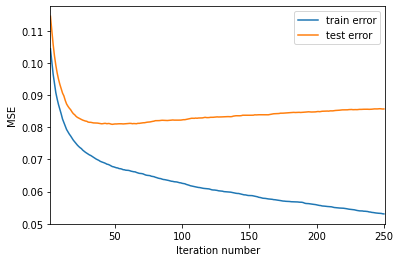

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
Ошибка алгоритма из 250 деревьев глубиной 6 с шагом 0.1 на тренировочной выборке: 0.04475877279524966
Ошибка алгоритма из 250 деревьев глубиной 6 с шагом 0.1 на тестовой выборке: 0.08927210107561125
[0.12, 0.1141893120738338, 0.10923478460588885, 0.10514218146494964, 0.10197541739284734, 0.09899336617217133, 0.09612362182192295, 0.09417711448631393, 0.09224188747829197, 0.09079797857152941, 0.0896617426888729, 0.08888564328511224, 0.08788146572472781, 0.08702209627003686, 0.08633175359834498, 0.08580136324089707, 0.08544979396547248, 0.0849605163126603, 0.08447113731834327, 0.0842060954191717, 0.08390326292742634, 0.08380006515830762, 0.08363290210655827, 0.08320492111605725, 0.08312826646293273, 0.0829778329811511, 0.08276785140381455, 0.08266212050314191, 0.08263852013864573, 0.08256437965500565, 0.08250264842912144, 0.08256823836352223, 0.0825969031025281, 0.08253971693711581, 0.08250644714939

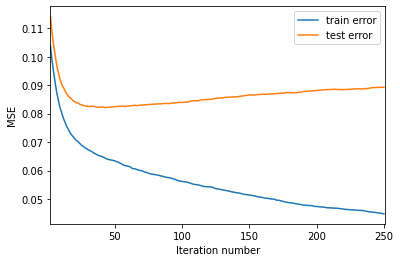

Лучшие параметры: Ошибка алгоритма из 250 деревьев глубиной 2 с шагом 0.1 на тестовой выборке: 0.08157734543778594


In [24]:
n_trees_l = [250]
max_depth_l = [2, 3, 4, 5, 6]
eta_l = [0.1]

tr_b, dp_b, et_b = grid_mtr(n_trees_l, max_depth_l, eta_l, X, y)

In [25]:
def gb_fit_fin(n_trees, max_depth, X, y, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки
    errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_reg_depth_lim(X, y, max_depth)
            
            errors.append(mean_squared_error(y, gb_predict_m(X, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_m(X, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_reg_depth_lim(X, bias(y, target), max_depth)
            
            errors.append(mean_squared_error(y, gb_predict_m(X, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, errors

In [26]:
coefs = [1] * tr_b # для простоты примем коэффициенты равными 1

trees, errors = gb_fit_fin(tr_b, dp_b, X, y, coefs, et_b)

In [27]:
prediction = gb_predict_m(test_X, trees, coefs, et_b)

In [28]:
prediction[prediction < 0] = 0
prediction[prediction > 1] = 1

In [29]:
res = test[['Id']].copy()
res = pd.concat([res, pd.DataFrame(prediction, columns=['choose'])], axis=1)
res

,Id,choose
0,10000,0.011411
1,10001,0.207379
2,10002,0.000000
3,10003,0.013938
4,10004,0.159371
...,...,...
9995,19995,0.175446
9996,19996,0.083064
9997,19997,0.285927
9998,19998,0.798624


In [30]:
res.to_csv("viv_cl_02.csv", sep=",", index=False)

# Методы классификации

## KNN

In [31]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [32]:
X_std = X.copy()
X_std

array([[3.50e+01, 0.00e+00, 2.15e+03, ..., 0.00e+00, 0.00e+00, 7.40e+01],
       [5.20e+01, 2.00e+00, 1.25e+03, ..., 0.00e+00, 1.00e+00, 5.70e+01],
       [2.90e+01, 3.00e+00, 1.75e+03, ..., 0.00e+00, 0.00e+00, 6.60e+01],
       ...,
       [4.40e+01, 5.00e+00, 1.75e+03, ..., 0.00e+00, 1.00e+00, 5.90e+01],
       [4.10e+01, 0.00e+00, 1.70e+03, ..., 0.00e+00, 0.00e+00, 7.20e+01],
       [4.10e+01, 5.00e+00, 1.20e+03, ..., 0.00e+00, 0.00e+00, 4.00e+01]])

In [33]:
X_std[:, 0] = calc_std_feat(X_std[:, 0])
X_std[:, 1] = calc_std_feat(X_std[:, 1])
X_std[:, 2] = calc_std_feat(X_std[:, 2])
X_std[:, 3] = calc_std_feat(X_std[:, 3])
X_std[:,10] = calc_std_feat(X_std[:,10])
X_std

array([[-1.34508978, -1.11773006,  0.85450883, ...,  0.        ,
         0.        ,  0.7035867 ],
       [ 0.77200475,  0.01426311, -0.86382602, ...,  0.        ,
         1.        , -0.54693332],
       [-2.09229961,  0.5802597 ,  0.09080445, ...,  0.        ,
         0.        ,  0.11510669],
       ...,
       [-0.22427503,  1.71225287,  0.09080445, ...,  0.        ,
         1.        , -0.39981332],
       [-0.59787995, -1.11773006, -0.0046586 , ...,  0.        ,
         0.        ,  0.5564667 ],
       [-0.59787995,  1.71225287, -0.95928907, ...,  0.        ,
         0.        , -1.79745335]])

In [34]:
X_std_crop = X_std.copy()
X_std_crop = np.delete(X_std, [4, 5, 6, 7, 8, 9], axis=1)
X_std_crop

array([[-1.34508978, -1.11773006,  0.85450883,  0.34514053,  0.7035867 ],
       [ 0.77200475,  0.01426311, -0.86382602,  0.34514053, -0.54693332],
       [-2.09229961,  0.5802597 ,  0.09080445, -0.90672937,  0.11510669],
       ...,
       [-0.22427503,  1.71225287,  0.09080445, -0.90672937, -0.39981332],
       [-0.59787995, -1.11773006, -0.0046586 ,  0.34514053,  0.5564667 ],
       [-0.59787995,  1.71225287, -0.95928907, -0.90672937, -1.79745335]])

In [35]:
test_X_std = test_X.copy()
test_X_std

array([[3.20e+01, 2.00e+00, 2.70e+03, ..., 0.00e+00, 0.00e+00, 9.00e+01],
       [3.50e+01, 6.00e+00, 1.80e+03, ..., 0.00e+00, 0.00e+00, 7.10e+01],
       [4.40e+01, 2.00e+00, 1.20e+03, ..., 0.00e+00, 0.00e+00, 4.50e+01],
       ...,
       [4.40e+01, 2.00e+00, 1.25e+03, ..., 0.00e+00, 0.00e+00, 6.30e+01],
       [5.10e+01, 5.00e+00, 1.00e+03, ..., 0.00e+00, 0.00e+00, 6.40e+01],
       [4.30e+01, 0.00e+00, 1.50e+03, ..., 0.00e+00, 0.00e+00, 4.10e+01]])

In [36]:
test_X_std[:, 0] = calc_std_feat(test_X_std[:, 0])
test_X_std[:, 1] = calc_std_feat(test_X_std[:, 1])
test_X_std[:, 2] = calc_std_feat(test_X_std[:, 2])
test_X_std[:, 3] = calc_std_feat(test_X_std[:, 3])
test_X_std[:,10] = calc_std_feat(test_X_std[:,10])
test_X_std

array([[-1.73371969,  0.00807395,  1.90046712, ...,  0.        ,
         0.        ,  1.90506341],
       [-1.36019396,  2.26652127,  0.19020064, ...,  0.        ,
         0.        ,  0.50485588],
       [-0.23961676,  0.00807395, -0.94997702, ...,  0.        ,
         0.        , -1.41121759],
       ...,
       [-0.23961676,  0.00807395, -0.85496222, ...,  0.        ,
         0.        , -0.08470519],
       [ 0.63194329,  1.70190944, -1.33003624, ...,  0.        ,
         0.        , -0.01101005],
       [-0.36412533, -1.12114971, -0.37988819, ...,  0.        ,
         0.        , -1.70599812]])

In [37]:
test_X_std_crop = test_X_std.copy()
test_X_std_crop = np.delete(test_X_std, [4, 5, 6, 7, 8, 9], axis=1)
test_X_std_crop

array([[-1.73371969,  0.00807395,  1.90046712,  1.64348174,  1.90506341],
       [-1.36019396,  2.26652127,  0.19020064,  0.37702436,  0.50485588],
       [-0.23961676,  0.00807395, -0.94997702, -0.88943302, -1.41121759],
       ...,
       [-0.23961676,  0.00807395, -0.85496222, -0.88943302, -0.08470519],
       [ 0.63194329,  1.70190944, -1.33003624,  0.37702436, -0.01101005],
       [-0.36412533, -1.12114971, -0.37988819, -0.88943302, -1.70599812]])

In [38]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [39]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    j = 1
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
        
        #print(classes)
        
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        if not j % 100:
            print(f"Строка: {j}")
        j += 1
    return answers

In [40]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [41]:
# X_train_std_crop, X_test_std_crop, y_train, y_test = train_test_split(X_std_crop, y, test_size=0.2, random_state=1)

# k = 6

# for k_i in range(1, k+1):
#     y_pred = knn(X_train_std_crop, y_train, X_test_std_crop, k_i)
#     print(f'Точность алгоритма при k = {k_i}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 0.793

Точность алгоритма при k = 3: 0.883

Точность алгоритма при k = 4: 0.865

Точность алгоритма при k = 5: 0.899

Точность алгоритма при k = 6: 0.890

In [42]:
# X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

# k = 7

# for k_i in range(3, k+1):
#     y_pred = knn(X_train_std, y_train, X_test_std, k_i)
#     print(f'Точность алгоритма при k = {k_i}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.880

Точность алгоритма при k = 4: 0.869

Точность алгоритма при k = 5: 0.894

Точность алгоритма при k = 6: 0.885

Точность алгоритма при k = 7: 0.896

In [43]:
# pred = knn(X_std_crop, y, test_X_std_crop, 5)

In [44]:
# res = test[['Id']].copy()
# res = pd.concat([res, pd.DataFrame(pred, columns=['choose'])], axis=1)
# res

In [45]:
# res.to_csv("viv_class_02.csv", sep=",", index=False)

## DecisionTree

In [46]:
class Node:
    # Класс узла
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [47]:
class Leaf:
    # Класс терминального узла (листа)
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction

In [48]:
def gini(labels):
    # Расчет критерия Джини

    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [49]:
def quality(left_labels, right_labels, current_gini):
    # Расчет качества

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [50]:
def split(data, labels, index, t):
    # Разбиение датасета в узле
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [51]:
def find_best_split(data, labels):
    # Нахождение наилучшего разбиения

    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [52]:
def build_tree(data, labels):
    # Построение дерева с помощью рекурсивной функции

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [53]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [54]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [55]:
def accuracy_metric(actual, predicted):
    # Введем функцию подсчета точности как доли правильных ответов

    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [56]:
def print_tree(node, spacing=""):
    # Напечатаем ход нашего дерева

    # Если лист, то выводим его прогноз
    if isinstance(node, Leaf):
        print(spacing + "Прогноз:", node.prediction)
        return

    # Выведем значение индекса и порога на этом узле
    print(spacing + 'Индекс', str(node.index))
    print(spacing + 'Порог', str(node.t))

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [57]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [58]:
# my_tree_dl = build_tree(X_train, y_train)
# train_answers = predict(X_train, my_tree_dl)
# answers = predict(X_test, my_tree_dl)
# train_accuracy = accuracy_metric(y_train, train_answers)
# test_accuracy = accuracy_metric(y_test, answers)
# print_tree(my_tree_dl, spacing="")
# print("train_accuracy: {:.4f}\ttest_accuracy: {:.4f}".format(train_accuracy, test_accuracy))

In [59]:
# res_tree_dl = build_tree(X, y)

In [60]:
# prediction = predict(test_X, res_tree_dl)

In [61]:
# res = test[['Id']].copy()
# res = pd.concat([res, pd.DataFrame(prediction, columns=['choose'])], axis=1)
# res

In [62]:
# res.to_csv("viv_class_14.csv", sep=",", index=False)

In [63]:
# X_crop = X.copy()
# X_crop = np.delete(X, [4, 5, 6, 7, 8, 9], axis=1)
# X_crop

In [64]:
# test_X_crop = test_X.copy()
# test_X_crop = np.delete(test_X, [4, 5, 6, 7, 8, 9], axis=1)
# test_X_crop

In [65]:
# res_tree_dl = build_tree(X_crop, y)

In [66]:
# prediction = predict(test_X_crop, res_tree_dl)

In [67]:
# res = test[['Id']].copy()
# res = pd.concat([res, pd.DataFrame(prediction, columns=['choose'])], axis=1)
# res

In [68]:
# res.to_csv("viv_class_12.csv", sep=",", index=False)

In [69]:
def calc_entropy(labels):
    #  подсчет количества объектов разных классов    
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    entropy = 0
    for label in classes:
        p = classes[label] / len(labels)
        if p != 0:
            entropy += p * np.log2(p)
        
    return entropy * (-1)

In [70]:
def quality_e(left_labels, right_labels, current_entropy):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_entropy - p * calc_entropy(left_labels) - (1 - p) * calc_entropy(right_labels)

In [71]:
def find_best_split_e(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_entropy = calc_entropy(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality_e(true_labels, false_labels, current_entropy)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [72]:
def build_tree_e(data, labels):

    quality, t, index = find_best_split_e(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree_e(true_data, true_labels)
    false_branch = build_tree_e(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [73]:
# my_tree_e = build_tree_e(X_train, y_train)
# train_answers = predict(X_train, my_tree_e)
# answers = predict(X_test, my_tree_e)
# train_accuracy = accuracy_metric(y_train, train_answers)
# test_accuracy = accuracy_metric(y_test, answers)
# print_tree(my_tree_e, spacing="")
# print("train_accuracy: {:.4f}\ttest_accuracy: {:.4f}".format(train_accuracy, test_accuracy))

In [74]:
# res_tree_e = build_tree(X, y)

In [75]:
# prediction = predict(test_X, res_tree_e)

In [76]:
# res = test[['Id']].copy()
# res = pd.concat([res, pd.DataFrame(prediction, columns=['choose'])], axis=1)
# res

In [77]:
# res.to_csv("viv_class_15.csv", sep=",", index=False)

In [78]:
def build_tree_ln(data, labels, l_num):
    # Построение дерева с помощью рекурсивной функции

    quality, t, index = find_best_split_ln(data, labels, l_num)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [79]:
def find_best_split_ln(data, labels, l_num):
    # Нахождение наилучшего разбиения

    #  обозначим минимальное количество объектов в узле
    min_leaf = l_num

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [ ]:
for l in range(3, 13, 2):
    my_tree_ln = build_tree_ln(X_train, y_train, l)
    train_answers = predict(X_train, my_tree_ln)
    answers = predict(X_test, my_tree_ln)
    train_accuracy = accuracy_metric(y_train, train_answers)
    test_accuracy = accuracy_metric(y_test, answers)
    print("Листьев: {} train_accuracy: {:.4f}\ttest_accuracy: {:.4f}".format(l, train_accuracy, test_accuracy))

# Logistic Regression

In [81]:
X_std_crop_wo = np.hstack((np.ones((y.shape[0], 1)), X_std_crop))
X_std_crop_wo

array([[ 1.        , -1.34508978, -1.11773006,  0.85450883,  0.34514053,
         0.7035867 ],
       [ 1.        ,  0.77200475,  0.01426311, -0.86382602,  0.34514053,
        -0.54693332],
       [ 1.        , -2.09229961,  0.5802597 ,  0.09080445, -0.90672937,
         0.11510669],
       ...,
       [ 1.        , -0.22427503,  1.71225287,  0.09080445, -0.90672937,
        -0.39981332],
       [ 1.        , -0.59787995, -1.11773006, -0.0046586 ,  0.34514053,
         0.5564667 ],
       [ 1.        , -0.59787995,  1.71225287, -0.95928907, -0.90672937,
        -1.79745335]])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_std_crop_wo, y, test_size=0.2, random_state=1)

In [83]:
X_train = X_train.T
X_train

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.77200475, -0.59787995,  2.26642441, ...,  0.39839983,
        -0.22427503, -0.59787995],
       [ 1.71225287, -0.55173347, -1.11773006, ..., -0.55173347,
         1.14625629, -1.11773006],
       [ 1.14089797,  0.09080445, -1.05475212, ..., -0.57743688,
         2.0000654 , -0.48197383],
       [ 1.59701043,  0.34514053, -0.90672937, ..., -0.90672937,
         1.59701043, -0.90672937],
       [ 1.65986673,  0.4829067 , -0.39981332, ..., -1.20897334,
         1.80698673,  0.4093467 ]])

In [84]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [85]:
X_test = X_test.T
X_test

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.51921458, -0.22427503,  0.77200475, ...,  0.02479491,
        -0.47334498,  1.76828452],
       [ 0.5802597 ,  1.14625629,  1.14625629, ...,  0.5802597 ,
        -0.55173347,  0.01426311],
       [ 0.85450883,  2.76376978, -0.95928907, ..., -0.38651079,
        -0.95928907, -0.48197383],
       [ 0.34514053,  1.59701043, -0.90672937, ...,  0.34514053,
        -0.90672937, -0.90672937],
       [ 0.92426671,  2.32190674,  0.18866669, ..., -0.54693332,
        -0.47337332, -0.17913332]])

In [86]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [87]:
def log_loss(w, X, y):
    m = X.shape[1]

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

In [88]:
def optimize(w, X, y, n_iterations, eta):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

In [89]:
def predict(w, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted

In [90]:
w0 = np.zeros((X_train.shape[0], 1))

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test - y_test)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[-2.218788  ]
 [ 0.02791373]
 [ 0.06204416]
 [-1.32068191]
 [ 0.43502904]
 [ 0.92002191]]
Точность на обучающей выборке: 88.750
Точность на тестовой выборке: 90.800


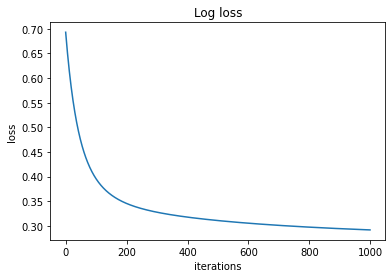

In [91]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)
plt.show()

In [92]:
test_X_std_crop

array([[-1.73371969,  0.00807395,  1.90046712,  1.64348174,  1.90506341],
       [-1.36019396,  2.26652127,  0.19020064,  0.37702436,  0.50485588],
       [-0.23961676,  0.00807395, -0.94997702, -0.88943302, -1.41121759],
       ...,
       [-0.23961676,  0.00807395, -0.85496222, -0.88943302, -0.08470519],
       [ 0.63194329,  1.70190944, -1.33003624,  0.37702436, -0.01101005],
       [-0.36412533, -1.12114971, -0.37988819, -0.88943302, -1.70599812]])

In [93]:
test_X_std_crop_wo = np.hstack((np.ones((test_X_std_crop.shape[0], 1)), test_X_std_crop))
test_X_std_crop_wo = test_X_std_crop_wo.T
test_X_std_crop_wo

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-1.73371969, -1.36019396, -0.23961676, ..., -0.23961676,
         0.63194329, -0.36412533],
       [ 0.00807395,  2.26652127,  0.00807395, ...,  0.00807395,
         1.70190944, -1.12114971],
       [ 1.90046712,  0.19020064, -0.94997702, ..., -0.85496222,
        -1.33003624, -0.37988819],
       [ 1.64348174,  0.37702436, -0.88943302, ..., -0.88943302,
         0.37702436, -0.88943302],
       [ 1.90506341,  0.50485588, -1.41121759, ..., -0.08470519,
        -0.01101005, -1.70599812]])

In [94]:
X_std_crop_wo = X_std_crop_wo.T
w0 = np.zeros((X_std_crop_wo.shape[0], 1))

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_std_crop_wo, y, n_iterations, eta)

y_predicted_train = predict(w, X_std_crop_wo)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")

Итоговый вектор весов w: [[-2.24676644]
 [ 0.04043953]
 [ 0.06287427]
 [-1.28565325]
 [ 0.41649156]
 [ 0.89921982]]
Точность на обучающей выборке: 89.120


In [95]:
# prediction = predict(w, test_X_std_crop_wo)
# a = np.array(prediction[0], dtype=int)
# a

In [96]:
# res = test[['Id']].copy()
# res = pd.concat([res, pd.DataFrame(a, columns=['choose'])], axis=1)
# res

In [97]:
# res.to_csv("viv_class_08.csv", sep=",", index=False)

# XGBoost

In [98]:
def bias(y, z):
    return y/(1 + np.exp(-1*y*z))

In [99]:
def gb_predict_m(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta * coef * pred_item(x, tree) for tree, coef in zip(trees_list, coef_list)]) for x in X])

In [100]:
def gb_fit_cl(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_depth_lim(X_train, y_train, max_depth)
            
            train_errors.append(accuracy_metric(y_train, gb_predict_m(X_train, trees, coefs, eta)))
            test_errors.append(accuracy_metric(y_test, gb_predict_m(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_m(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_depth_lim(X_train, bias(y_train, target), max_depth)
            
            train_errors.append(accuracy_metric(y_train, gb_predict_m(X_train, trees, coefs, eta)))
            test_errors.append(accuracy_metric(y_test, gb_predict_m(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [101]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('Accuracy')
    plt.xlim(2, n_trees+1)
    plt.plot(list(range(2, n_trees+1)), train_err[1:], label='train error')
    plt.plot(list(range(2, n_trees+1)), test_err[1:], label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [102]:
def grid_ctr(n_trees_l, max_depth_l, eta_l, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    err_min = np.inf
    for tr in n_trees_l:
        for dp in max_depth_l:
            for et in eta_l:
                coefs = [1] * tr # для простоты примем коэффициенты равными 1
                trees, train_errors, test_errors = gb_fit_cl(tr, dp, X_train, X_test, y_train, y_test, coefs, et)
                train_prediction = gb_predict_m(X_train, trees, coefs, et)
                print(f'Ошибка алгоритма из {tr} деревьев глубиной {dp} с шагом {et} на тренировочной выборке: {accuracy_metric(y_train, train_prediction)}')
                test_prediction = gb_predict_m(X_test, trees, coefs, et)
                err = accuracy_metric(y_test, test_prediction)
                print(f'Ошибка алгоритма из {tr} деревьев глубиной {dp} с шагом {et} на тестовой выборке: {err}')
                if err_min > err:
                    tr_b = tr
                    dp_b = dp
                    et_b = et
                    err_min = err
                get_error_plot(tr, train_errors, test_errors)
    print(f'Лучшие параметры: Ошибка алгоритма из {tr} деревьев глубиной {dp} с шагом {et} на тестовой выборке: {err_min}')
    return tr_b, dp_b, et_b

In [103]:
n_trees_l = [10, 30]
max_depth_l = [3, 5]
eta_l = [1, 0.1]

# grid_ctr(n_trees_l, max_depth_l, eta_l, X, y)

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 1 на тренировочной выборке: 89.09333333333333

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 1 на тестовой выборке: 88.16000000000001

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 88.96

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 88.03999999999999

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 1 на тренировочной выборке: 89.14666666666666

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 1 на тестовой выборке: 87.76

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 88.78666666666668

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тестовой выборке: 87.36

Ошибка алгоритма из 30 деревьев глубиной 3 с шагом 1 на тренировочной выборке: 89.09333333333333

Ошибка алгоритма из 30 деревьев глубиной 3 с шагом 1 на тестовой выборке: 88.16000000000001

In [104]:
def gb_fit_cl_fin(n_trees, max_depth, X, y, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки
    errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree_depth_lim(X, y, max_depth)
            
            errors.append(accuracy_metric(y, gb_predict_m(X, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_m(X, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree_depth_lim(X, bias(y, target), max_depth)
            
            errors.append(accuracy_metric(y, gb_predict_m(X, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, errors

In [105]:
n_trees = 10
max_depth = 3
eta = 1
coefs = [1] * n_trees # для простоты примем коэффициенты равными 1

# trees, errors = gb_fit_cl_fin(n_trees, max_depth, X, y, coefs, eta)

In [106]:
# prediction = gb_predict_m(test_X, trees, coefs, eta)
# prediction

In [107]:
# res = test[['Id']].copy()
# res = pd.concat([res, pd.DataFrame(prediction, columns=['choose'])], axis=1)
# res

In [108]:
# res.to_csv("viv_class_04.csv", sep=",", index=False)

# Случайный лес

In [109]:
np.random.seed(42)

In [110]:
def get_bootstrap(data, labels, N):
    
    n_samples = data.shape[0]
    bootstrap = []

    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        for j in range(n_samples):
            sample_index = np.random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [111]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    np.random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [112]:
def find_best_split(data, labels):
    # Нахождение наилучшего разбиения

    #  обозначим минимальное количество объектов в узле
    min_leaf = 1

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    # выбор индекса из подвыборки длиной sqrt(n_features)
    subsample = get_subsample(n_features)
    
    for index in subsample:
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [113]:
def build_tree(data, labels):
    # Построение дерева с помощью рекурсивной функции

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [114]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [115]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [116]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [117]:
def tree_vote(forest, data):
    # предсказание голосованием деревьев

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [119]:
n_trees_list = [1, 3, 5, 10]
train_accuracy_list = []
test_accuracy_list = []

for n_trees in n_trees_list:
    my_forest = random_forest(X_train, y_train, n_trees)
    train_answers = tree_vote(my_forest, X_train)
    test_answers = tree_vote(my_forest, X_test)
    train_accuracy = accuracy_metric(y_train, train_answers)
    print(f'\nТочность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')
    train_accuracy_list.append(train_accuracy)
    test_accuracy = accuracy_metric(y_test, test_answers)
    print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')
    test_accuracy_list.append(test_accuracy)


Точность случайного леса из 1 деревьев на обучающей выборке: 91.287
Точность случайного леса из 1 деревьев на тестовой выборке: 86.250

Точность случайного леса из 3 деревьев на обучающей выборке: 93.263
Точность случайного леса из 3 деревьев на тестовой выборке: 89.000

Точность случайного леса из 5 деревьев на обучающей выборке: 93.812
Точность случайного леса из 5 деревьев на тестовой выборке: 89.550

Точность случайного леса из 10 деревьев на обучающей выборке: 92.925
Точность случайного леса из 10 деревьев на тестовой выборке: 89.900


Точность случайного леса из 1 деревьев на обучающей выборке: 91.287
Точность случайного леса из 1 деревьев на тестовой выборке: 86.250

Точность случайного леса из 3 деревьев на обучающей выборке: 93.263
Точность случайного леса из 3 деревьев на тестовой выборке: 89.000

Точность случайного леса из 10 деревьев на обучающей выборке: 93.312
Точность случайного леса из 10 деревьев на тестовой выборке: 90.100

Точность случайного леса из 50 деревьев на обучающей выборке: 93.975
Точность случайного леса из 50 деревьев на тестовой выборке: 90.100

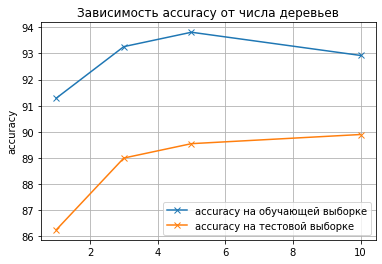

In [120]:
plt.plot(n_trees_list, train_accuracy_list, marker='x')
plt.plot(n_trees_list, test_accuracy_list, marker='x')

plt.title("Зависимость accuracy от числа деревьев")
plt.ylabel("accuracy")
plt.legend(labels=["accuracy на обучающей выборке", "accuracy на тестовой выборке"])
plt.grid()
plt.show()

In [121]:
# res_forest = random_forest(X, y, 10)

In [122]:
# answers = tree_vote(res_forest, test_X)

In [123]:
# a = np.array(answers, dtype=int)
# a

In [124]:
# res = test[['Id']].copy()
# res = pd.concat([res, pd.DataFrame(a, columns=['choose'])], axis=1)
# res

In [125]:
# res.to_csv("viv_class_11.csv", sep=",", index=False)